Much help from:
https://www.machinelearningplus.com/nlp/topic-modeling-visualization-how-to-present-results-lda-models/#6.-What-is-the-Dominant-topic-and-its-percentage-contribution-in-each-document

In [ ]:
import gensim

dictionary = gensim.corpora.Dictionary.load('dictionary_title_081420.gensim')
corpus = gensim.corpora.MmCorpus('corpus_title_081420.mm') 
lda = gensim.models.ldamodel.LdaModel.load('model10_title_081420.gensim')

In [7]:
print(lda.print_topics())

[(0, '0.037*"post" + 0.028*"reddit" + 0.013*"fuck" + 0.011*"work" + 0.011*"people" + 0.010*"sick" + 0.008*"know" + 0.007*"girlfriend" + 0.007*"much" + 0.007*"shit"'), (1, '0.018*"people" + 0.016*"go" + 0.013*"reddit" + 0.013*"dear" + 0.010*"hate" + 0.009*"service" + 0.009*"subreddit" + 0.008*"fuck" + 0.007*"please" + 0.007*"comment"'), (2, '0.014*"fuck" + 0.012*"like" + 0.012*"make" + 0.008*"someone" + 0.006*"sick" + 0.006*"family" + 0.006*"drive" + 0.006*"feel" + 0.006*"karma" + 0.006*"swear"'), (3, '0.028*"ban" + 0.014*"need" + 0.012*"hate" + 0.011*"someone" + 0.010*"year" + 0.010*"help" + 0.009*"people" + 0.008*"like" + 0.008*"hour" + 0.008*"complaint"'), (4, '0.014*"mother" + 0.014*"want" + 0.014*"stupid" + 0.008*"fuck" + 0.007*"really" + 0.007*"school" + 0.007*"open" + 0.007*"paper" + 0.007*"reddit" + 0.007*"delete"'), (5, '0.019*"people" + 0.014*"really" + 0.013*"hate" + 0.011*"fuck" + 0.010*"tired" + 0.008*"make" + 0.008*"reddit" + 0.008*"want" + 0.008*"call" + 0.007*"sick"'), (

What is the dominant topic, and its percentage contribution in each document?

for title and body

In [93]:
# open csv file containing documents, clean document, save in a list (data)
import topic_modeling
data1 = []
with open('data/complaints_body_title.csv') as f:
    for line in f:
        tokens = topic_modeling.process_document(line)
        data1.append(tokens)
# save the tokenized body as .csv file
import pandas as pd 
df = pd.DataFrame(data1)
df.to_csv("data/tokenized_body_title.csv", sep="," , index=False)

for body only

In [119]:
# # open csv file containing documents, clean document, save in a list (data)
# import topic_modeling
# data = []
# with open('data/complaints_body_only.csv') as f:
#     for line in f:
#         tokens = topic_modeling.process_document(line)
#         data.append(tokens)

# read in saved tokens and save into data
data = []
with open('data/tokenized_body_edited.csv') as f:
    for line in f:
        split_line = line.split(",")

        tokens = []
        for token in split_line:
            if len(token) > 0 and token != "\n":
                tokens.append(token)

        data.append(tokens)

In [101]:
def get_dominant_topic(ldamodel=None, corpus=corpus):
    # initialize output DataFrame
    dominant_df = pd.DataFrame()
    
    # Get main topic in each document
    for row_number, row in enumerate(lda[corpus]):
        
        # row : a list of a series of tuples holding the topic(int) and its percentage(float) in the document
        row = sorted(row, key=lambda x: x[1], reverse=True) 
        
        # sort the row by percentage topic
                        
        # Get the dominant topic, percent contribution, and keywords for each document
        for j, (topic_num, perc_topic) in enumerate(row): 
            # we only want the dominant topic, so just get the first tuple, which we find when j==0
            if j == 0: # => dominant topic
                topic_perc_tuple = lda.show_topic(topic_num)
                topic_keywords = ",".join([word for word, prop in topic_perc_tuple])
                dominant_df = dominant_df.append(pd.Series([ int(topic_num), round(perc_topic,4), topic_keywords ]), ignore_index=True)
            else:
                break
    dominant_df.columns =  ['Dominant_Topic', 'Percent_Contribution', 'Topic_Keywords']
    
    return dominant_df

In [102]:
import pandas as pd

df_topic_sents_keywords = get_dominant_topic(ldamodel=lda, corpus=corpus)

df_dominant_topic = df_topic_sents_keywords.reset_index();
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords'];

In [103]:
df_dominant_topic

,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords
0,0,5.0,0.5500,"people,really,hate,fuck,tired,make,reddit,want..."
1,1,9.0,0.7000,"fuck,shit,like,life,parent,friend,stupid,thing..."
2,2,7.0,0.7000,"people,hate,reddit,fuck,like,make,complain,nev..."
3,3,1.0,0.8714,"people,go,reddit,dear,hate,service,subreddit,f..."
4,4,0.0,0.7000,"post,reddit,fuck,work,people,sick,know,girlfri..."
...,...,...,...,...
994,994,9.0,0.4644,"fuck,shit,like,life,parent,friend,stupid,thing..."
995,995,7.0,0.7000,"people,hate,reddit,fuck,like,make,complain,nev..."
996,996,8.0,0.8200,"stop,really,suck,feel,reddit,want,pandemic,com..."
997,997,1.0,0.7750,"people,go,reddit,dear,hate,service,subreddit,f..."


Frequency Distribution of Word Counts in Documents

In [104]:
contents = pd.Series(data)
contents

0      [iran, actually, regime, change, forum, think,...
1      [askaconservative, design, echo, chamber, fine...
2      [start, try, play, rainbow, xbox, play, random...
3      [away, dinner, calms, continue, movie, really,...
4      [go, grab, block, grab, hand, like, wrestle, h...
                             ...                        
239                                      [dermatologist]
240                                                [buy]
241                                           [schedule]
242                                              [never]
243                                               [past]
Length: 244, dtype: object

In [130]:
# read in saved tokens and save into data
data2 = []
with open('data/tokenized_body_title_edited.csv') as f:
    for line in f:
        split_line = line.split(",")

        tokens = []
        for token in split_line:
            if len(token) > 0 and token != "\n":
                tokens.append(token)

        data2.append(tokens)

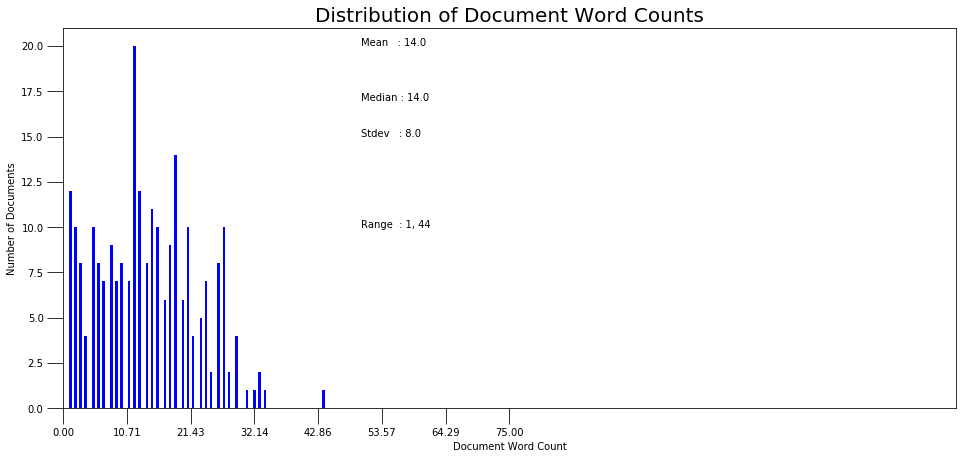

In [135]:
import matplotlib.pyplot as plt
import numpy as np

doc_lengths = [len(d) for d in data]

# Plot
plt.figure(figsize=(16,7))
plt.hist(doc_lengths, bins = 100, color='blue')
plt.text(50, 20, "Mean   : " + str(round(np.mean(doc_lengths))))
plt.text(50, 17, "Median : " + str(round(np.median(doc_lengths))))
plt.text(50, 15, "Stdev   : " + str(round(np.std(doc_lengths))))
plt.text(50, 10, "Range  : " + str(min(doc_lengths)) + ", " + str(max(doc_lengths)))
#plt.text(250, 1000, "1%ile    : " + str(round(np.quantile(doc_lengths, q=0.01))))
#plt.text(250, 500, "99%ile  : " + str(round(np.quantile(doc_lengths, q=0.99))))

plt.gca().set(xlim=(0, 150), ylabel='Number of Documents', xlabel='Document Word Count')
plt.tick_params(size=16)
plt.xticks(np.linspace(0,75,8))
plt.title('Distribution of Document Word Counts', fontdict=dict(size=20))
plt.show()

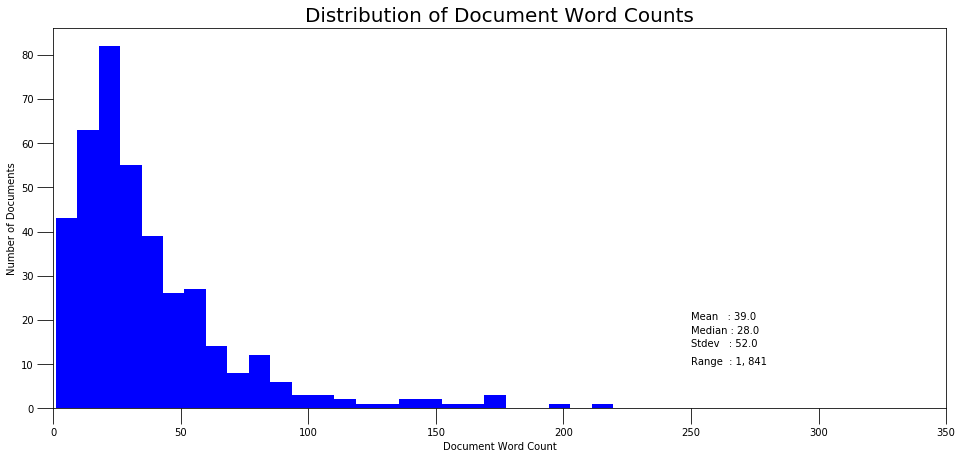

In [133]:
import matplotlib.pyplot as plt
import numpy as np

doc_lengths = [len(d) for d in data2]

# Plot
plt.figure(figsize=(16,7))
plt.hist(doc_lengths, bins = 100, color='blue')
plt.text(250, 20, "Mean   : " + str(round(np.mean(doc_lengths))))
plt.text(250, 17, "Median : " + str(round(np.median(doc_lengths))))
plt.text(250, 14, "Stdev   : " + str(round(np.std(doc_lengths))))
plt.text(250, 10, "Range  : " + str(min(doc_lengths)) + ", " + str(max(doc_lengths)))
#plt.text(250, 1000, "1%ile    : " + str(round(np.quantile(doc_lengths, q=0.01))))
#plt.text(250, 500, "99%ile  : " + str(round(np.quantile(doc_lengths, q=0.99))))

plt.gca().set(xlim=(0, 150), ylabel='Number of Documents', xlabel='Document Word Count')
plt.tick_params(size=16)
plt.xticks(np.linspace(0,350,8))
plt.title('Distribution of Document Word Counts', fontdict=dict(size=20))
plt.show()

In [132]:
len(data2)

397

**TO DO** I don't understand why I'm getting 4000+ documents when I definitely only have 1000, but I'll figure that out later. It means the graph above is a tad bit useless.  
Other ideas:
show topics clustered by time (could save index number, since posts are read in the same way every time, and map the dominant topic to its text) on a graph potentially  
give names to each of the topics  
compare different models (3, 7, 10)  


Word Clouds of Top N Keywords in Each Topic

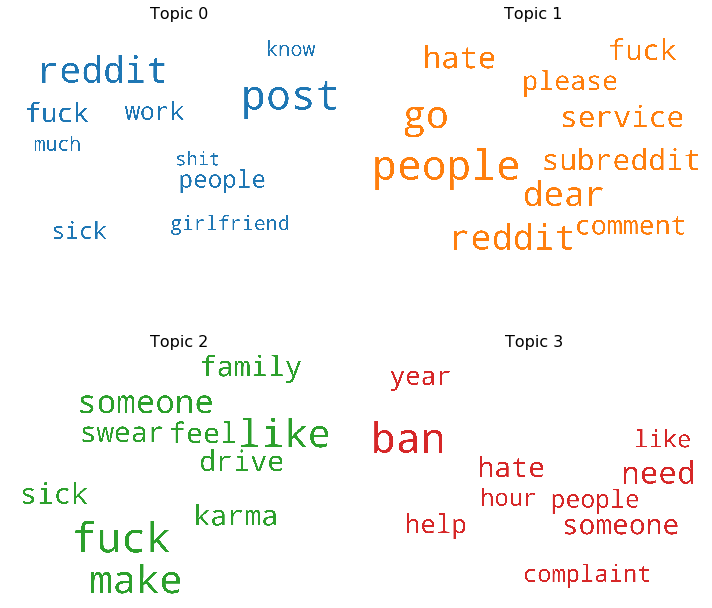

In [88]:
# 1. Wordcloud of Top N words in each topic
from matplotlib import pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import matplotlib.colors as mcolors

cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'

cloud = WordCloud(stopwords=STOPWORDS,
                  background_color='white',
                  width=2500,
                  height=1800,
                  max_words=10,
                  colormap='tab10',
                  color_func=lambda *args, **kwargs: cols[i],
                  prefer_horizontal=1.0)

topics = lda.show_topics(formatted=False)
'''
fig, axes = plt.subplots(2, 2, figsize=(10,10), sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):
    fig.add_subplot(ax)
    topic_words = dict(topics[i][1])
    cloud.generate_from_frequencies(topic_words, max_font_size=300)
    plt.gca().imshow(cloud)
    plt.gca().set_title('Topic ' + str(i), fontdict=dict(size=16))
    plt.gca().axis('off')


plt.subplots_adjust(wspace=0, hspace=0)
plt.axis('off')
plt.margins(x=0, y=0)
plt.tight_layout()
plt.show()
'''

Word Counts of Topic Keywords

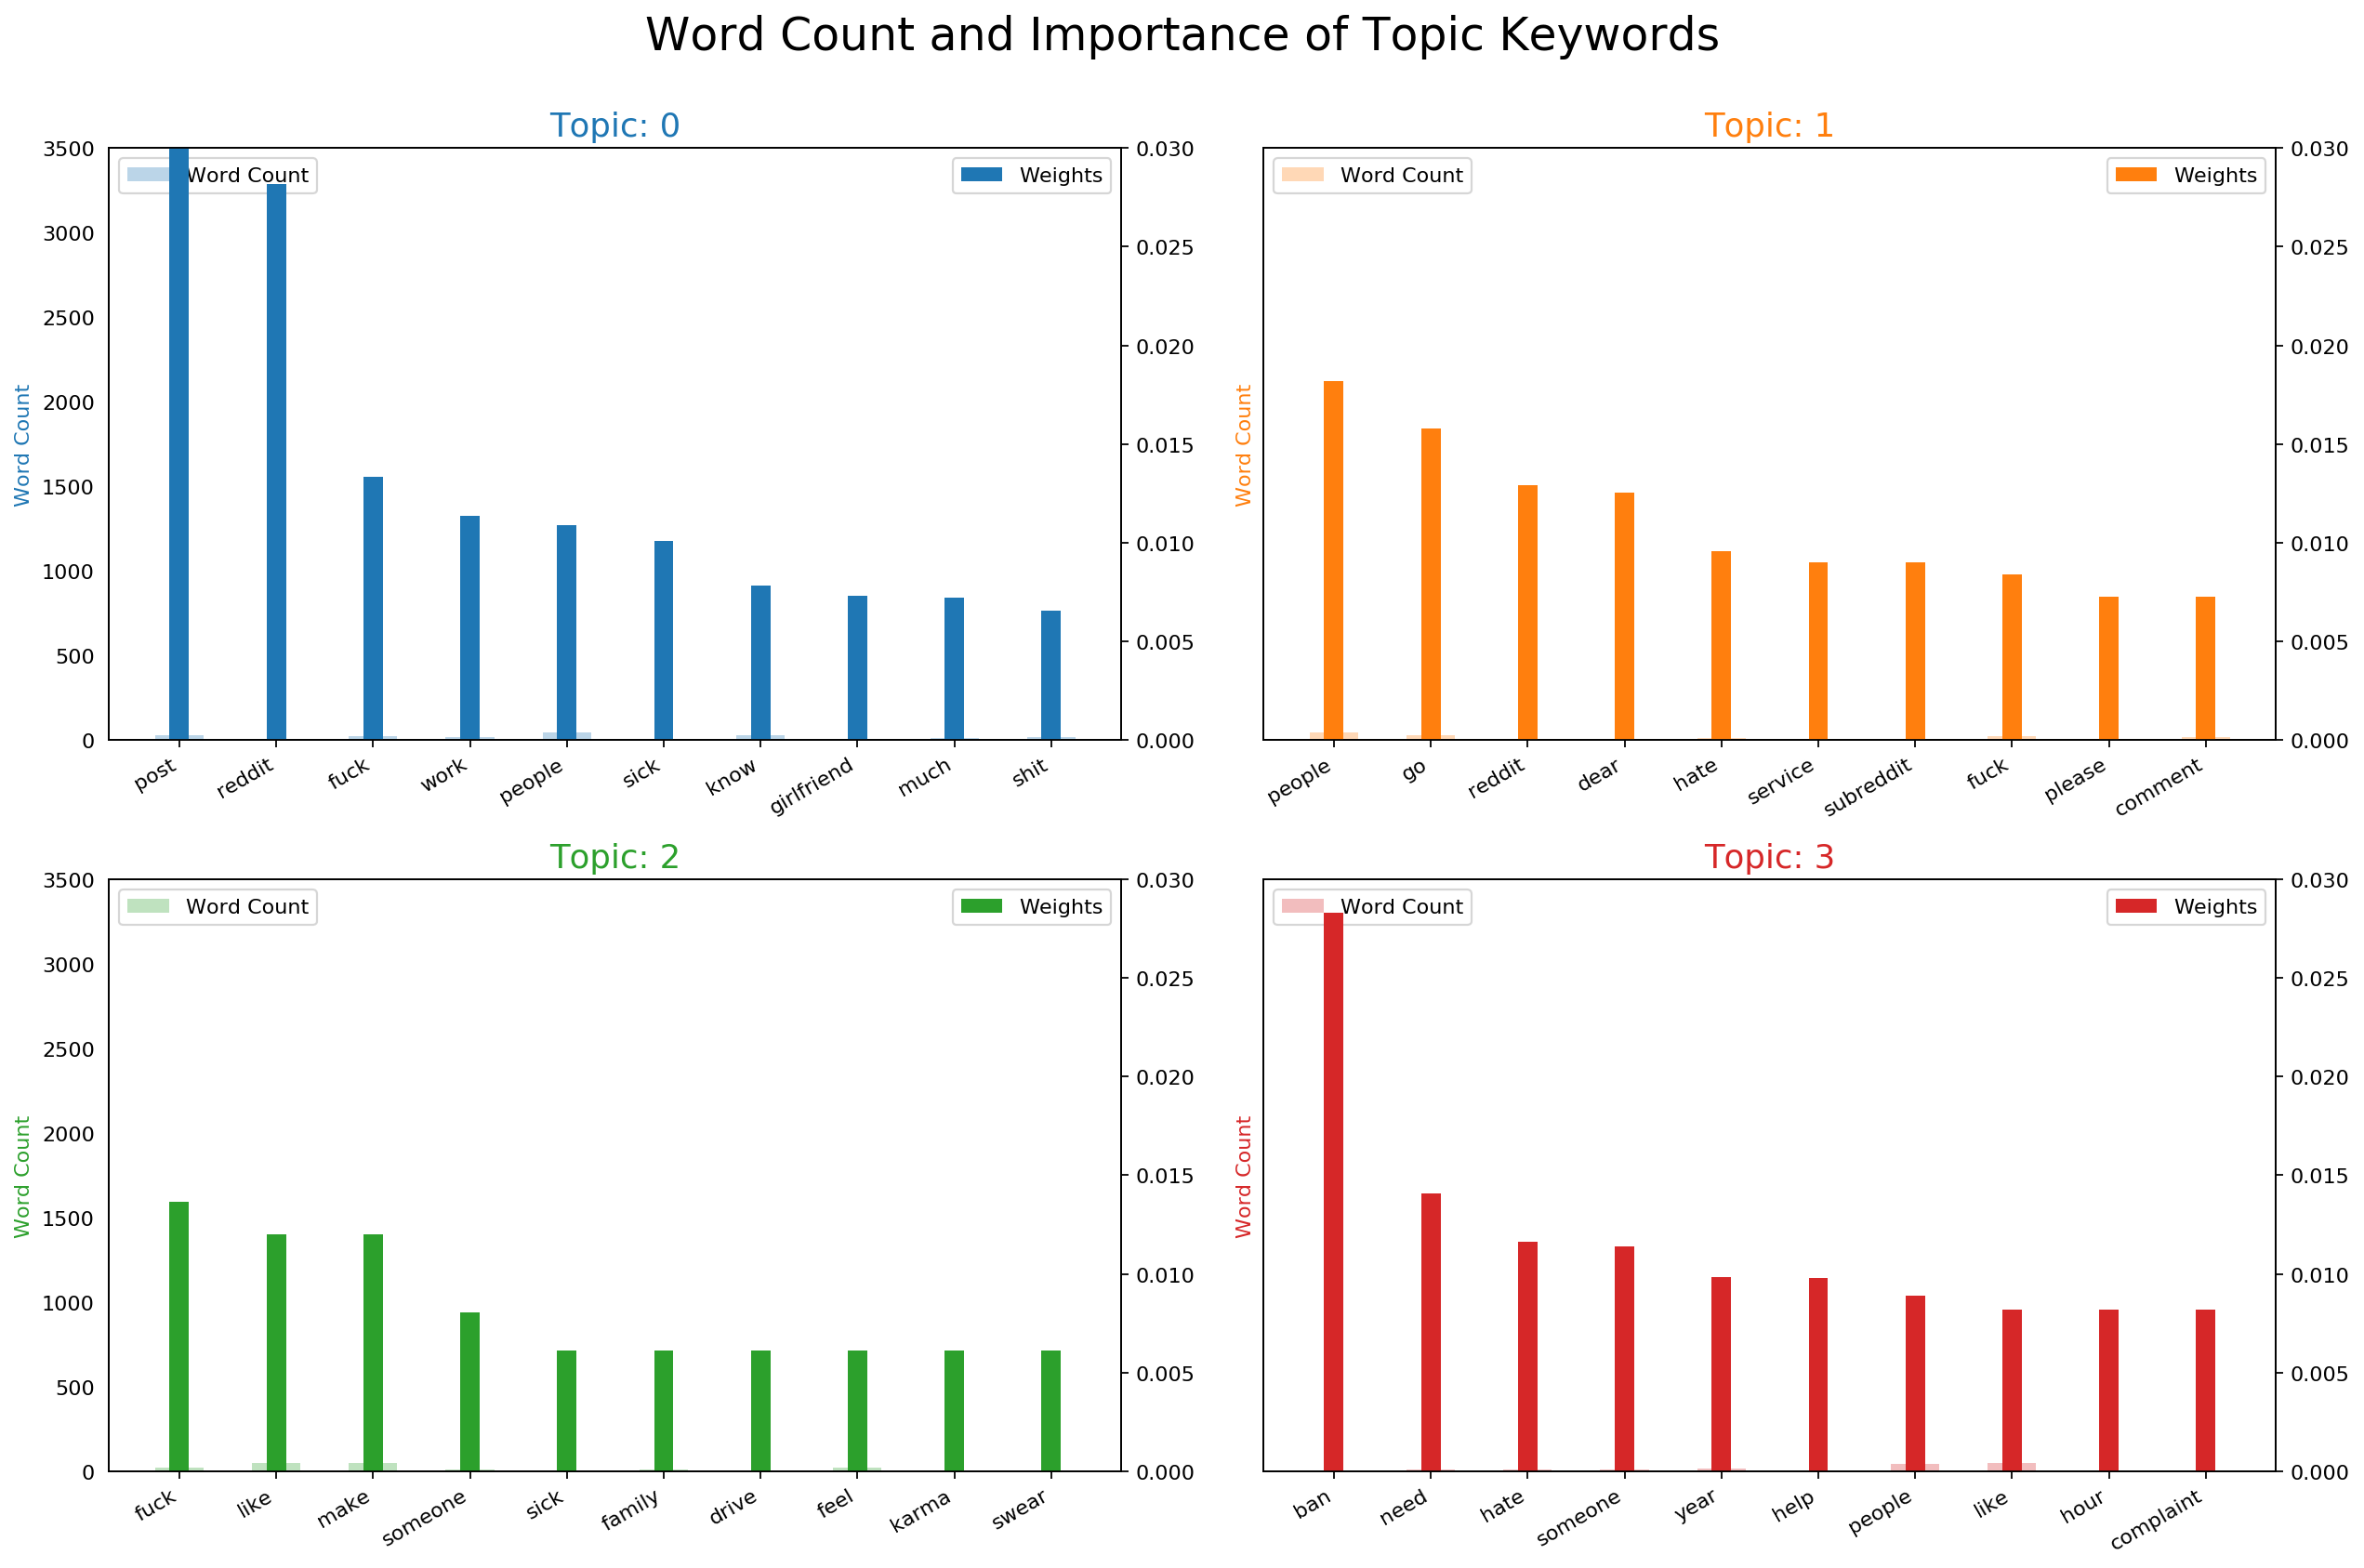

In [128]:
from collections import Counter
topics = lda.show_topics(formatted=False)
data_flat = [w for w_list in data for w in w_list]
counter = Counter(data_flat)

out = []
for i, topic in topics:
    for word, weight in topic:
        out.append([word, i , weight, counter[word]])

df = pd.DataFrame(out, columns=['word', 'topic_id', 'importance', 'word_count'])        

# Plot Word Count and Weights of Topic Keywords
fig, axes = plt.subplots(2, 2, figsize=(16,10), sharey=True, dpi=160)
cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]
for i, ax in enumerate(axes.flatten()):
    ax.bar(x='word', height="word_count", data=df.loc[df.topic_id==i, :], color=cols[i], width=0.5, alpha=0.3, label='Word Count')
    ax_twin = ax.twinx()
    ax_twin.bar(x='word', height="importance", data=df.loc[df.topic_id==i, :], color=cols[i], width=0.2, label='Weights')
    ax.set_ylabel('Word Count', color=cols[i])
    ax_twin.set_ylim(0, 0.030); ax.set_ylim(0, 3500)
    ax.set_title('Topic: ' + str(i), color=cols[i], fontsize=16)
    ax.tick_params(axis='y', left=False)
    ax.set_xticklabels(df.loc[df.topic_id==i, 'word'], rotation=30, horizontalalignment= 'right')
    ax.legend(loc='upper left'); ax_twin.legend(loc='upper right')

fig.tight_layout(w_pad=2)    
fig.suptitle('Word Count and Importance of Topic Keywords', fontsize=22, y=1.05)    
plt.show()

**TO DO:** Need to get all these things to show more than 4 topics

T-SNE Clustering 

In [129]:
# Get topic weights and dominant topics ------------
from sklearn.manifold import TSNE
from bokeh.plotting import figure, output_file, show
from bokeh.models import Label
from bokeh.io import output_notebook

# Get topic weights
topic_weights = []
for i, row_list in enumerate(lda_model[corpus]):
    topic_weights.append([w for i, w in row_list[0]])

# Array of topic weights    
arr = pd.DataFrame(topic_weights).fillna(0).values

# Keep the well separated points (optional)
arr = arr[np.amax(arr, axis=1) > 0.35]

# Dominant topic number in each doc
topic_num = np.argmax(arr, axis=1)

# tSNE Dimension Reduction
tsne_model = TSNE(n_components=2, verbose=1, random_state=0, angle=.99, init='pca')
tsne_lda = tsne_model.fit_transform(arr)

# Plot the Topic Clusters using Bokeh
output_notebook()
n_topics = 4
mycolors = np.array([color for name, color in mcolors.TABLEAU_COLORS.items()])
plot = figure(title="t-SNE Clustering of {} LDA Topics".format(n_topics), 
              plot_width=900, plot_height=700)
plot.scatter(x=tsne_lda[:,0], y=tsne_lda[:,1], color=mycolors[topic_num])
show(plot)

ModuleNotFoundError: No module named 'bokeh'